In [12]:
import os
import shutil
import random
import keras
import tensorflow

In [13]:
classes_number = 4

In [14]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Photo directory paths
train_path = 'data/Farm_Dataset/train'
valid_path = 'data/Farm_Dataset/valid'
test_path = 'data/Farm_Dataset/test'

# MobileNet expect 224 by 224 images.
# Process train, valid, and test batches.
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [15]:
mobile = keras.applications.MobileNetV3Small()

In [16]:
mobile.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_1[0][0]']            
                                16)                                                

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_37 (ReLU)                (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_37[0][0]']               
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_21[0][0]']            
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_45 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_35[0][0]']
                                                                                                  
 tf.math.multiply_35 (TFOpLambd  (None, 1, 1, 240)   0           ['re_lu_45[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_23[0][0]',            
 /Mul (Multiply)                240)                              'tf.math.multiply_35[0][0]']    
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_42 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_52 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_42[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_42 (TFOpLambd  (None, None, None,   0          ['re_lu_52[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_28 (Multiply)         (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_45[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_30[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_59 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_49[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_49 (TFOpLambd  (None, None, None,   0          ['re_lu_59[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_33 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_49[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_35[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [17]:
from keras.layers import Activation, Dense 
from tensorflow.keras import Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

# Set the final layer to output classes
x = mobile.layers[-2].output
output = Dense(units=classes_number, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_1[0][0]']            
                                16)                                                         

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_37 (ReLU)                (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_37[0][0]']               
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_21[0][0]']            
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_45 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_35[0][0]']
                                                                                                  
 tf.math.multiply_35 (TFOpLambd  (None, 1, 1, 240)   0           ['re_lu_45[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_23[0][0]',            
 /Mul (Multiply)                240)                              'tf.math.multiply_35[0][0]']    
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_42 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_52 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_42[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_42 (TFOpLambd  (None, None, None,   0          ['re_lu_52[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_28 (Multiply)         (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_45[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_30[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_59 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_49[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_49 (TFOpLambd  (None, None, None,   0          ['re_lu_59[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_33 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_49[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_35[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras.losses

# Restore best weights from the 50th early weights
prediction = EarlyStopping(
    monitor="val_accuracy", patience=50, restore_best_weights=True
)

# Training model
history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=500, 
    verbose=2,
    callbacks=[prediction]
)

Epoch 1/500
100/100 - 26s - loss: 0.4333 - accuracy: 0.8330 - val_loss: 1.6907 - val_accuracy: 0.2500 - 26s/epoch - 256ms/step
Epoch 2/500
100/100 - 74s - loss: 0.1220 - accuracy: 0.9630 - val_loss: 1.8290 - val_accuracy: 0.2438 - 74s/epoch - 743ms/step
Epoch 3/500
100/100 - 44s - loss: 0.0598 - accuracy: 0.9790 - val_loss: 2.0456 - val_accuracy: 0.2500 - 44s/epoch - 442ms/step
Epoch 4/500
100/100 - 49s - loss: 0.0243 - accuracy: 0.9920 - val_loss: 2.0425 - val_accuracy: 0.2500 - 49s/epoch - 486ms/step
Epoch 5/500
100/100 - 38s - loss: 0.0100 - accuracy: 0.9970 - val_loss: 2.1114 - val_accuracy: 0.2500 - 38s/epoch - 381ms/step
Epoch 6/500
100/100 - 29s - loss: 0.0126 - accuracy: 0.9960 - val_loss: 1.9297 - val_accuracy: 0.2500 - 29s/epoch - 290ms/step
Epoch 7/500
100/100 - 48s - loss: 0.0226 - accuracy: 0.9940 - val_loss: 1.8056 - val_accuracy: 0.2550 - 48s/epoch - 478ms/step
Epoch 8/500
100/100 - 33s - loss: 0.0360 - accuracy: 0.9870 - val_loss: 2.1695 - val_accuracy: 0.2500 - 33s/epo

Epoch 65/500
100/100 - 33s - loss: 0.0025 - accuracy: 0.9990 - val_loss: 1.4454 - val_accuracy: 0.8425 - 33s/epoch - 334ms/step
Epoch 66/500
100/100 - 28s - loss: 0.0274 - accuracy: 0.9940 - val_loss: 0.3141 - val_accuracy: 0.9388 - 28s/epoch - 285ms/step
Epoch 67/500
100/100 - 40s - loss: 0.0143 - accuracy: 0.9980 - val_loss: 2.0595 - val_accuracy: 0.7825 - 40s/epoch - 405ms/step
Epoch 68/500
100/100 - 29s - loss: 1.0095e-04 - accuracy: 1.0000 - val_loss: 0.8782 - val_accuracy: 0.8662 - 29s/epoch - 294ms/step
Epoch 69/500
100/100 - 53s - loss: 5.3711e-04 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9837 - 53s/epoch - 533ms/step
Epoch 70/500
100/100 - 45s - loss: 1.8696e-04 - accuracy: 1.0000 - val_loss: 0.2783 - val_accuracy: 0.9638 - 45s/epoch - 448ms/step
Epoch 71/500
100/100 - 40s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0456 - val_accuracy: 0.9862 - 40s/epoch - 401ms/step
Epoch 72/500
100/100 - 29s - loss: 9.2115e-04 - accuracy: 0.9990 - val_loss: 0.1199 - val_ac

Epoch 128/500
100/100 - 40s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 2.9802e-10 - val_accuracy: 1.0000 - 40s/epoch - 397ms/step
Epoch 129/500
100/100 - 47s - loss: 2.7027e-04 - accuracy: 1.0000 - val_loss: 1.4901e-10 - val_accuracy: 1.0000 - 47s/epoch - 468ms/step
Epoch 130/500
100/100 - 31s - loss: 0.0019 - accuracy: 0.9990 - val_loss: 8.9404e-06 - val_accuracy: 1.0000 - 31s/epoch - 307ms/step
Epoch 131/500
100/100 - 48s - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.1918 - val_accuracy: 0.9750 - 48s/epoch - 477ms/step
Epoch 132/500
100/100 - 45s - loss: 0.0161 - accuracy: 0.9990 - val_loss: 2.9148e-04 - val_accuracy: 1.0000 - 45s/epoch - 447ms/step
Epoch 133/500
100/100 - 47s - loss: 7.2398e-04 - accuracy: 0.9990 - val_loss: 2.6922e-06 - val_accuracy: 1.0000 - 47s/epoch - 469ms/step
Epoch 134/500
100/100 - 38s - loss: 0.0061 - accuracy: 0.9990 - val_loss: 5.3047e-08 - val_accuracy: 1.0000 - 38s/epoch - 376ms/step
Epoch 135/500
100/100 - 54s - loss: 0.0024 - accuracy: 0.9990 - v

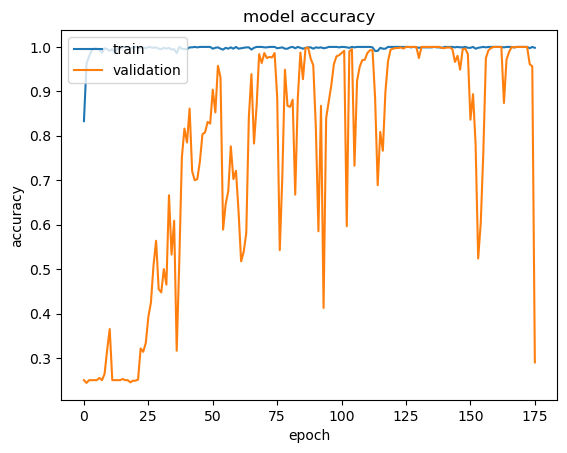

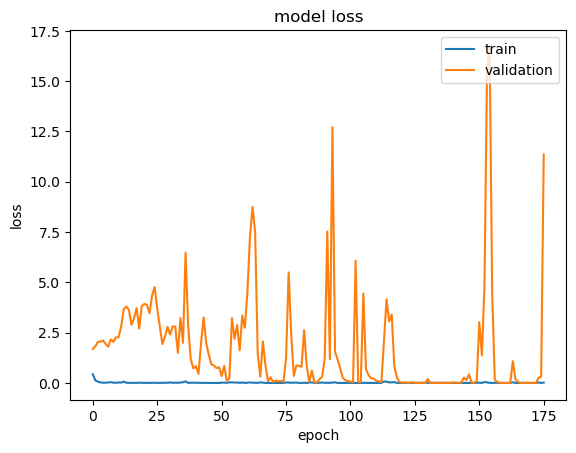

INFO:tensorflow:Assets written to: Trained_Mobile_Small_Model\assets


INFO:tensorflow:Assets written to: Trained_Mobile_Small_Model\assets


In [9]:
def plot_all(history):
    """
    The plot_all() function takes the history of the trained model
    and create two plots for accuracy and loss of both training and validation.
    The plots are saved as png files

    Args:
        history: The history to use and plot

    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig("plot_accuracy.png")
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig("plot_loss.png")
    plt.show()
    

plot_all(history)
# Save model weights
model.save("Trained_Mobile_Small_Model")

In [19]:
# Create test batches
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

In [20]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [21]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

[[150   0   0   0]
 [150   0   0   0]
 [150   0   0   0]
 [150   0   0   0]]


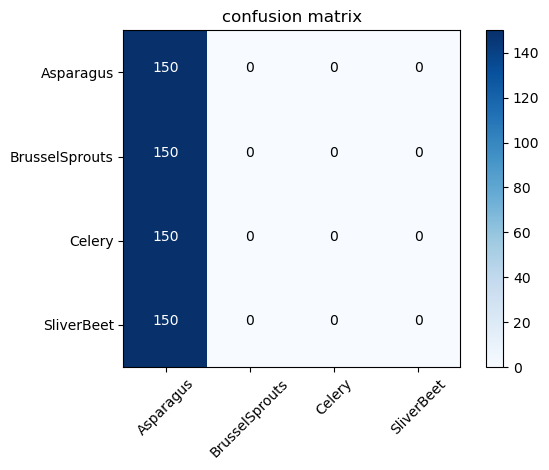

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig("confusion.png")
    

cm_plot_labels = ['Asparagus', 'BrusselSprouts', 'Celery', 'SliverBeet']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')